<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/6_performance_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Last amended: 17th May, 2020
Myfolder: /home/ashok/Documents/10.higgsBoson

Create a virtual environment for Conda with essential packages:
conda create -n sklearn
             -c anaconda
             -c conda-forge
              python=3.7.6 scikit-learn=0.23.2 pandas ipython numpy spyder imbalanced-learn matplotlib

Objectives:
              i)  Quick modeling with multiple models
             ii)  Learn performance measures: ROC, AUC, confusion_matrix
            iii) ROC curve
             iv)  To display uniformity of coding in sklearn

"""


In [ ]:
# 0.0
# Upgrade current imbalanced-learn
# Default version is 0.4.3. 
# Current version is 0.8.0
#! pip install -U imbalanced-learn

In [ ]:
# 0.1
#import imblearn
#imblearn.__version__   # 0.8.0
#import sklearn
#sklearn.__version__

## Libraries

### Call libraries

In [1]:
# Import libraries
# 1.0
# %reset -f

# 1.1
import pandas as pd
import numpy as np

# 1.2 For generating/importing datasets
from sklearn.datasets import make_classification
from sklearn.datasets import load_digits

# 1.3 For data splitting
from sklearn.model_selection import train_test_split

# 1.4 For data standardization
from sklearn.preprocessing import StandardScaler

# 1.5 For noise removal and dimensionality reduction
from sklearn.decomposition import PCA

# 1.6 For pipelining
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as mp

# 1.7 For modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from imblearn.over_sampling import SMOTE, ADASYN,BorderlineSMOTE,SVMSMOTE

# 1.8 For performance measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix

# 1.9 Plotting metrics related graphs
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# 1.10 Misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os



In [2]:
# 1.11 Display multiple commands out put from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Generate and split data

## Understanding PCA
Unsupervised learning method for dimensionality reduction

In a dataset, PCA assumes that the directions with the largest variances are the most “important” (i.e, the most principal). For example, the dimensionality of our two-dimensional data can be reduced to a single dimension by projecting each sample onto the first principal component (See below)

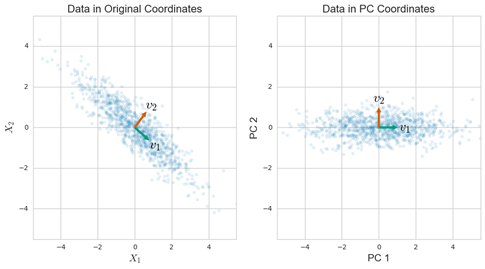

Principal components are new derived features that are constructed as <u>linear transformations</u> of the original features. These transformations are carried out in such a way that the new features (i.e., principal components) are <b>uncorrelated</b> and most of the information within the original features is squeezed or compressed into the first components. So, the idea is that a 10-dimensional data gives you 10-principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on.   

Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables. See figure below:

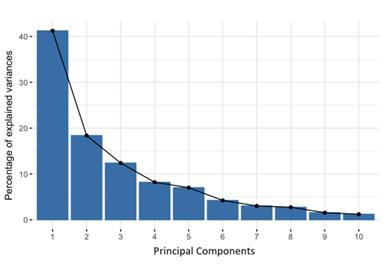

An important thing to realize here is that, <b>the principal components are less interpretable</b> and don’t have any real meaning since they are constructed as linear combinations of the initial variables.

Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. The relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more the information it has. To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible.

Note that, the PCA method is particularly useful when the variables within the data set are <b>highly correlated</b>. Correlation indicates that there is redundancy in the data. Due to this redundancy, PCA can be used to reduce the original variables into a smaller number of new variables ( = principal components) explaining most of the variance in the original variables. In the following figure such correlation is absent.

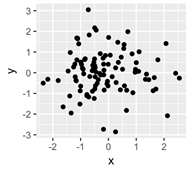

#### Simple experiment with mnist digits

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels. The MNIST database contains 60,000 training images and 10,000 testing images.

In [ ]:
# 3.0 Get images of handwritten digits and the corresponding symbols:
X,y = load_digits(return_X_y= True)

# 3.1
X.shape  # (1797, 64)
         # Images:    1797
         # Pixels:      64
         # Img size: 8 X 8

# 3.2 Digit corresponding to each row
print()
y[:12]

In [ ]:
# 3.3 Plot first two digits:

fig = plt.figure()

# 3.3.1
ax1 = fig.add_subplot(1,2,1)
_=imshow(X[0].reshape(8,8))

# 3.3.2
ax1 = fig.add_subplot(1,2,2)
_=imshow(X[1].reshape(8,8))

Steps:  

> Split data train/test  
> Make a pipeline  
>> pipe==> train data-> Standardize->PCA->RF-classifier<br>
>> pipe.fit(train-data)<br>
>> Make predictions  <br>

> Get accuracy<br>

In [26]:
# 4.0 Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 )

# 4.1 Develop pipeline of operations 
#     and modeling without and with PCA

pipe1 = make_pipeline(
                     StandardScaler(),
                     RandomForestClassifier()
                     )

# 4.1.1 Pipeline with PCA

pipe2 = make_pipeline(
                     StandardScaler(),
                     PCA(n_components=0.95),   # Get as many components that explain
                                               # upto 95% of total variance
                     RandomForestClassifier()
                     )

# 4.2 Train the two pipes:
_=pipe1.fit(X_train,y_train)
_=pipe2.fit(X_train,y_train)

# 4.3 MAke predictions in the two cases
y_pred1 = pipe1.predict(X_test)
y_pred2 = pipe2.predict(X_test)

# 4.4 Check accuracy in the two cases
print("\n\n---Accuracy----")
np.sum(y_test == y_pred1)/len(y_test) ; print()
np.sum(y_test == y_pred2)/len(y_test)

# 4.5
print("\n\n--How many PCA components--")
print("--Our new data dimension?--")
pipe2[1].n_components_   # 40



---Accuracy----


0.975925925925926

0.9648148148148148



--How many PCA components--
--Our new data dimension?--


40

Explained variance  
The fraction of `variance explained` by a principal component is the ratio between the variance of that principal component and the total variance. 

`Explained variance of` PC<sub>k</sub> = `(Variance of component k)/(Total variance of data)`



For several principal components, add up their individual variances and divide by the total variance. In the case of mnist dataset, let us plot explained variance, principal component-wise.

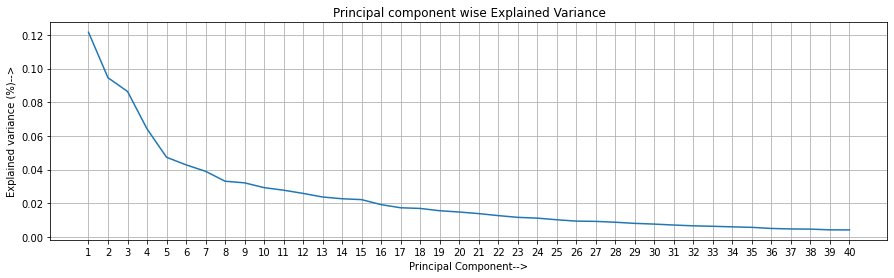

In [27]:
# 5.0 How much variance is explained
#     by each of the 40 component?

# 5.0.1
exp_var = pipe2[1].explained_variance_ratio_

# 5.0.2
fig = plt.figure(figsize = (15,4))
_=plt.plot(range(1,len(exp_var) + 1), exp_var)
_=plt.xlabel("Principal Component-->")
_=plt.ylabel("Explained variance (%)-->")
_=plt.title("Principal component wise Explained Variance")
_=plt.xticks(range(1,len(exp_var)+1))
plt.grid()

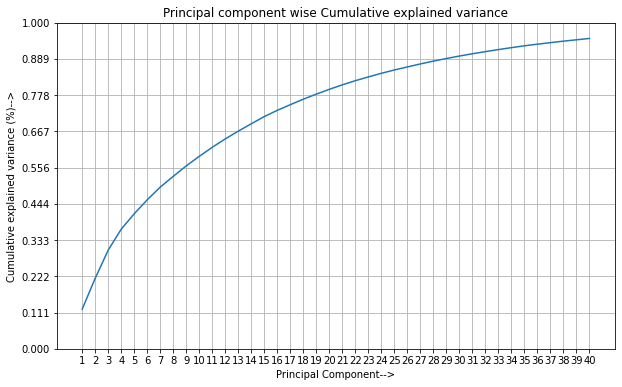

In [37]:
# 5.1 Graph of cumulative variance explained as we progress
#      from one component to other:

exp_var = np.cumsum(
                    pipe2[1].explained_variance_ratio_
                    )

# 5.2
fig = plt.figure(figsize = (10,6))
_=plt.plot(range(1,len(exp_var) + 1), exp_var)
_=plt.xlabel("Principal Component-->")
_=plt.ylabel("Cumulative explained variance (%)-->")
_=plt.title("Principal component wise Cumulative explained variance")
_=plt.xticks(range(1,len(exp_var) + 1) )
_=plt.yticks(np.linspace (0, 1.0, 10) )
plt.grid()

##Generate and split data

In [ ]:
# 6.0 Generate arrays of data for classification:
#    See examples here: https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922

X,y = make_classification(
                           n_samples=10000,
                           n_features=30,
                           n_informative= 26,     # Relevant features
                           n_redundant=4,         # Four features are linear combination of some features
                           n_repeated =0,         # No duplicate features
                           scale = None,          # Multiply features by some random value 
                           weights=[0.9, 0.1],    # Makes data imbalanced
                           class_sep = 1.5,       # Less it is more difficult class separation
                                                  # Value of 0.75 may make hard-decision boundary
                           flip_y = 0.1           # Flip randomly 10% of class labels
                         )

# 6.0.1
X.shape               # (10000, 30)
print()
y[:8]
print()
np.sum(y)/len(y)      # 0.1375, Dataset is imbalanced 


In [ ]:
# 6.1 Split, shuffle and perform stratified sampling:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    stratify = y
                                                    )


# 6.1.1
X_train.shape # (7000, 30)
X_test.shape  # (3000, 30)

In [41]:
# 6.2 Perform PCA to remove noisy columns from data:

pipe = make_pipeline(
                      StandardScaler(),      # This is a must before PCA
                      PCA(n_components=0.95)
                    )


# 6.2.1 Get PCA output
X_new = pipe.fit_transform(X_train)
X_new.shape   # (7000, 20)                   

(7000, 21)

In [ ]:
# 6.3 Examine correlation within each pair of principal components:

pd.DataFrame(                                                # 
              np.round(                                      # Round up to two decimal pts
                         np.corrcoef(X_new, rowvar=False),   # Array of pairwise correlations
                         2
                      )
            )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
1,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
2,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
3,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
4,0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
5,-0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
6,-0.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
7,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
8,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
9,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0


### PCA--A Quick example

In [ ]:
# Get mnist data
Xd,yd = load_digits(return_X_y= True)
# About data
Xd.shape  # (1797, 64)  1797 images of flattened size 64 (=8 X 8)
print()
yd[:12]   # What digits are stored

(1797, 64)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

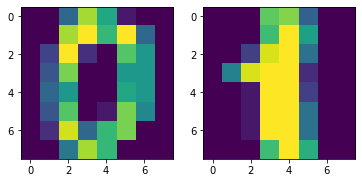

In [ ]:
# Draw first two digits
# We have to first reshape 
# digits as 8X8:

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
_=imshow(Xd[0].reshape(8,8))
ax1 = fig.add_subplot(1,2,2)
_=imshow(Xd[1].reshape(8,8))

In [ ]:
# Split mnist data in train/test
X_tr,X_te,y_tr,y_te = train_test_split(Xd,yd, test_size = 0.3 )

# Make modeling pipeline
pipe = make_pipeline(
                     StandardScaler(),
                     PCA(n_components=0.95),
                     RandomForestClassifier()
                     )

# Train pipe over data
_=pipe.fit(X_tr,y_tr)

# Make predictions & get accuracy
y_pred = pipe.predict(X_te)
print("\n\n--Accuracy---\n")
np.sum(y_te == y_pred)/len(y_te)

# How many features are there after PCA
print("\n\n--No of features after PCA---\n")
pipe[1].n_components_



--Accuracy---



0.9555555555555556



--No of features after PCA---



40

In [ ]:

X_new.shape  # (10000, 19)


# 2.2.1
X_train.shape         # (7000, 20)
y_train.shape         # (7000,)
np.sum(y_train)       # 103

# 3.0 Perform data balancing:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
X_resampled.shape      # (13794, 20)
#X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
#X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train, y_train)
#X_resampled, y_resampled = SVMSMOTE().fit_resample(X_train,y_train)

# 3.1 Create an instance of Gradient Boosting classifier
clf_gbm = GradientBoostingClassifier(
                                     learning_rate = 0.05,
                                     n_estimators = 500
                                     )

# 3.2 Train classifier on resampled data
clf_gbm.fit(X_resampled,y_resampled)
# 3.3 MAke predictions
y_pred_gbm= clf_gbm.predict(X_test)
# 3.4 Performance measures
recall_score(y_test,y_pred_gbm,pos_label = 1)     # 0.6590909090909091
precision_score(y_test,y_pred_gbm,pos_label = 1)  # 0.29
# 3.5
f1_score(y_test,y_pred_gbm, pos_label =1)         # 0.40277777777777773
# 3.6
confusion_matrix(y_test,y_pred_gbm)

# 4.0 Train gbm classifier on original data:
clf1_gbm = GradientBoostingClassifier(
                                       learning_rate = 0.05,
                                       n_estimators = 500
                                      )
# 4.1
clf1_gbm.fit(X_train,y_train)
# 4.2
y1_pred_gbm= clf_gbm.predict(X_test)
# 4.3
f1_score(y_test,y1_pred_gbm, pos_label =1)         #  0.40277777777777773
recall_score(y_test,y1_pred_gbm,pos_label = 1)     #  0.6590909090909091
precision_score(y_test,y1_pred_gbm,pos_label = 1)  # 0.29
confusion_matrix(y_test,y1_pred_gbm)


# 5.0 Using RandomForestClassifier on resampled data:
clf_rf = RandomForestClassifier(n_estimators = 300)
clf_rf.fit(X_resampled,y_resampled)
y_pred_rf=clf_rf.predict(X_test)
f1_score(y_test,y_pred_rf, pos_label =1)  # 0.5977011494252873
recall_score(y_test,y_pred_rf,pos_label = 1)  # 0.5909090909090909
precision_score(y_test,y_pred_rf,pos_label = 1) # 0.6046511627906976
confusion_matrix(y_test,y_pred_rf)

# 5.1 Using RF classifier on original data
clf1_rf = RandomForestClassifier(n_estimators =300)
clf1_rf.fit(X_train,y_train)
y1_pred_rf=clf1_rf.predict(X_test)
f1_score(y_test,y1_pred_rf, pos_label =1)       # 0.5846153846153846
recall_score(y_test,y1_pred_rf,pos_label = 1)   # 0.4318181818181818
precision_score(y_test,y1_pred_rf,pos_label = 1) # 0.9047619047619048
confusion_matrix(y_test,y1_pred_rf)

# 6.1 Plot confusion matrix in each case
plot_confusion_matrix(clf_rf, X_test,y_test)
plot_confusion_matrix(clf_gbm, X_test,y_test)


# 6.2 Plot both ROC curves on the same axes
#       Positive label is always 1 in these plots
fig = plt.figure()
ax = fig.subplots()
plot_roc_curve(
                 clf_gbm,            # Estimator instance
                 X_test, y_test,
                 response_method = 'auto',  # Default target response: predict_proba
                 ax =ax
               )

plot_roc_curve(
                clf_rf,
                X_test, y_test,
                ax =ax
               )

plt.show()


# 6.3 Plot precision recall curves
#       Positive label is always 1 in these plots
fig = plt.figure()
ax = fig.subplots()
plot_precision_recall_curve(clf_rf,  X_test, y_test, ax =ax)
plot_precision_recall_curve(clf_gbm, X_test, y_test, ax =ax)
plt.show()

##### I am done ############
